# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import the date for the time plots were generated
from datetime import date
date = date.today()

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "metric"

# Define an empty list to fetch the weather data for each city

city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={unit}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                   "Lat": city_lat, 
                   "Lng": city_lng, 
                   "Max Temp": city_max_temp,
                   "Humidity": city_humidity,
                   "Cloudiness": city_clouds,
                   "Wind Speed": city_wind,
                   "Country": city_country,
                   "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | afaahiti
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | utrik
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | kirkwall
Processing Record 8 of Set 1 | sabang
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | slave lake
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | saipan
Processing Record 13 of Set 1 | chonchi
Processing Record 14 of Set 1 | gemena
Processing Record 15 of Set 1 | fyodorovka
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | merizo village
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | west island
Processing Record 22 of Set 1 | ushuaia
Processing 

City not found. Skipping...
Processing Record 38 of Set 4 | rio grande
Processing Record 39 of Set 4 | silapathar
Processing Record 40 of Set 4 | teodoro sampaio
Processing Record 41 of Set 4 | fenyi
Processing Record 42 of Set 4 | ghat
Processing Record 43 of Set 4 | elmendorf air force base
City not found. Skipping...
Processing Record 44 of Set 4 | urzhar
Processing Record 45 of Set 4 | denkanikota
Processing Record 46 of Set 4 | gillette
Processing Record 47 of Set 4 | kingston
Processing Record 48 of Set 4 | kodiak
Processing Record 49 of Set 4 | kingman
Processing Record 50 of Set 4 | margaret river
Processing Record 1 of Set 5 | darwin
Processing Record 2 of Set 5 | karasburg
Processing Record 3 of Set 5 | rongelap
Processing Record 4 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 5 of Set 5 | marshall
Processing Record 6 of Set 5 | petoskey
Processing Record 7 of Set 5 | sarangani
Processing Record 8 of Set 5 | saudarkrokur
Processing Record 9 of Set 5 | kam

Processing Record 25 of Set 8 | garoua boulai
Processing Record 26 of Set 8 | olsztyn
Processing Record 27 of Set 8 | sayan
Processing Record 28 of Set 8 | sassandra
Processing Record 29 of Set 8 | wenchang
Processing Record 30 of Set 8 | mpika
Processing Record 31 of Set 8 | antsiranana
Processing Record 32 of Set 8 | genhe
Processing Record 33 of Set 8 | likasi
Processing Record 34 of Set 8 | abu al matamir
Processing Record 35 of Set 8 | belomorsk
Processing Record 36 of Set 8 | boyolangu
Processing Record 37 of Set 8 | dawukou
Processing Record 38 of Set 8 | almus
Processing Record 39 of Set 8 | kharp
Processing Record 40 of Set 8 | papayal
Processing Record 41 of Set 8 | ingeniero jacobacci
Processing Record 42 of Set 8 | berezovo
Processing Record 43 of Set 8 | sagna
Processing Record 44 of Set 8 | bovalino
Processing Record 45 of Set 8 | vanino
Processing Record 46 of Set 8 | pailon
Processing Record 47 of Set 8 | bel ombre
Processing Record 48 of Set 8 | carutapera
Processing R

Processing Record 15 of Set 12 | archangelos
Processing Record 16 of Set 12 | alaghsas
Processing Record 17 of Set 12 | tidjikja
Processing Record 18 of Set 12 | sitka
Processing Record 19 of Set 12 | meadow lakes
Processing Record 20 of Set 12 | lat yao
Processing Record 21 of Set 12 | alvand
Processing Record 22 of Set 12 | brandon
Processing Record 23 of Set 12 | freetown
Processing Record 24 of Set 12 | fort st. john
Processing Record 25 of Set 12 | andrews
Processing Record 26 of Set 12 | lubao
Processing Record 27 of Set 12 | birao
Processing Record 28 of Set 12 | isangel
Processing Record 29 of Set 12 | vizinga
Processing Record 30 of Set 12 | sinop
Processing Record 31 of Set 12 | jajpur
Processing Record 32 of Set 12 | el colomo
Processing Record 33 of Set 12 | birnin kebbi
Processing Record 34 of Set 12 | otterndorf
Processing Record 35 of Set 12 | harstad
Processing Record 36 of Set 12 | qarqaraly
Processing Record 37 of Set 12 | san fernando de apure
Processing Record 38 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,13.74,68,100,2.84,AU,1691723043
1,edinburgh of the seven seas,-37.0676,-12.3116,12.14,70,97,12.43,SH,1691723043
2,afaahiti,-17.7500,-149.2833,25.59,69,100,8.53,PF,1691723043
3,port-aux-francais,-49.3500,70.2167,3.28,77,44,16.48,TF,1691723044
4,utrik,11.2278,169.8474,28.29,76,10,6.25,MH,1691723044


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,13.74,68,100,2.84,AU,1691723043
1,edinburgh of the seven seas,-37.0676,-12.3116,12.14,70,97,12.43,SH,1691723043
2,afaahiti,-17.7500,-149.2833,25.59,69,100,8.53,PF,1691723043
3,port-aux-francais,-49.3500,70.2167,3.28,77,44,16.48,TF,1691723044
4,utrik,11.2278,169.8474,28.29,76,10,6.25,MH,1691723044


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

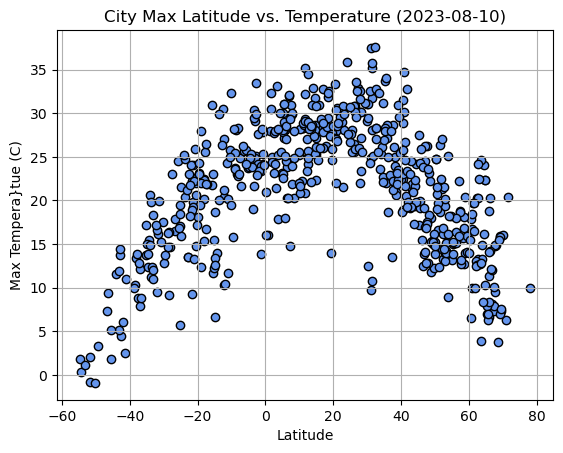

In [8]:
# Build scatter plot for latitude vs. temperature
x_value = city_data_df["Lat"]
y_value = city_data_df["Max Temp"]
plt.scatter(x_value, y_value, marker = "o", facecolor="cornflowerblue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Tempera}tue (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

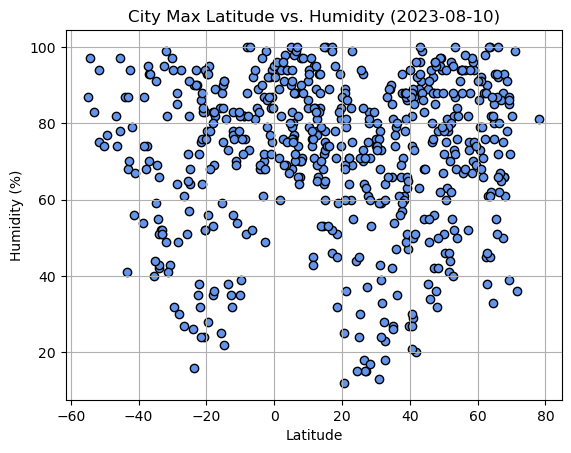

In [9]:
# Build the scatter plots for latitude vs. humidity
x_value = city_data_df["Lat"]
y_value = city_data_df["Humidity"]
plt.scatter(x_value, y_value, marker = "o", facecolor="cornflowerblue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

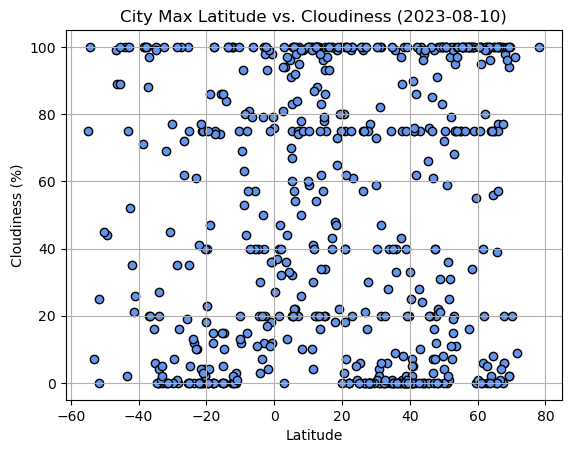

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_value = city_data_df["Lat"]
y_value = city_data_df["Cloudiness"]
plt.scatter(x_value, y_value, marker = "o", facecolor="cornflowerblue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

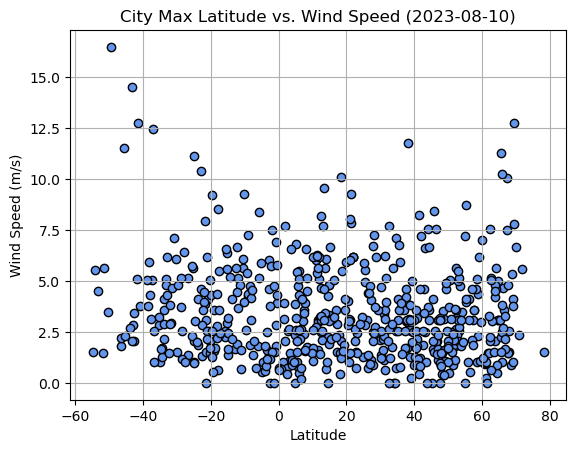

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_value = city_data_df["Lat"]
y_value = city_data_df["Wind Speed"]
plt.scatter(x_value, y_value, marker = "o", facecolor="cornflowerblue", edgecolors="black")
# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plot


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,utrik,11.2278,169.8474,28.29,76,10,6.25,MH,1691723044
5,college,64.8569,-147.8028,22.34,85,100,3.09,US,1691723044
6,kirkwall,58.9848,-2.9587,14.03,94,75,6.17,GB,1691723044
7,sabang,5.8933,95.3214,28.04,77,57,5.50,ID,1691723045
9,slave lake,55.2834,-114.7690,14.99,94,100,8.75,CA,1691723046


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,13.74,68,100,2.84,AU,1691723043
1,edinburgh of the seven seas,-37.0676,-12.3116,12.14,70,97,12.43,SH,1691723043
2,afaahiti,-17.7500,-149.2833,25.59,69,100,8.53,PF,1691723043
3,port-aux-francais,-49.3500,70.2167,3.28,77,44,16.48,TF,1691723044
8,waitangi,-43.9535,-176.5597,11.57,87,100,2.68,NZ,1691723045


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.46806886631023237


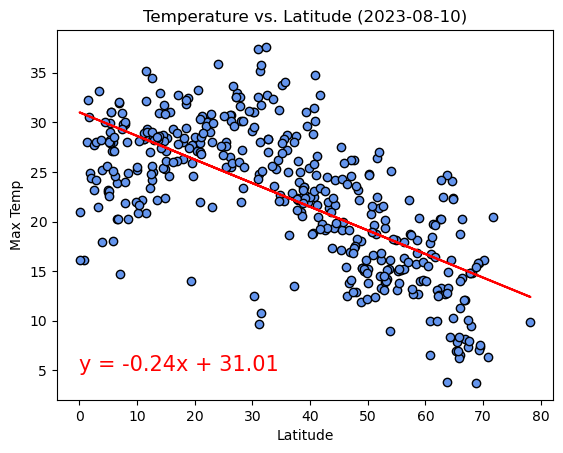

In [15]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker = "o", facecolor="cornflowerblue", edgecolors="black")
plt.plot(x_value,regress_values,"r-")

# Incorporate the other graph properties
plt.title(f"Temperature vs. Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq, (0,5), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.6070785477974457


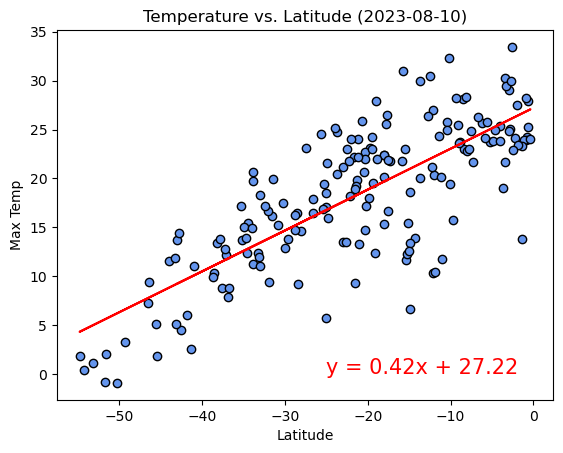

In [16]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker = "o", facecolor="cornflowerblue", edgecolors="black")
plt.plot(x_value,regress_values,"r-")

# Incorporate the other graph properties
plt.title(f"Temperature vs. Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq, (-25,0), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship: In the temperature vs latitude scatter plots we do some correlation between the two. 
In the northern hemisphere the r value is 0.46806886631023237 which suggests a moderate negative correlation.
In the southern hemisphere the r value is 0.6070785477974457 which is a moderate positive correlation.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0011823818557285355


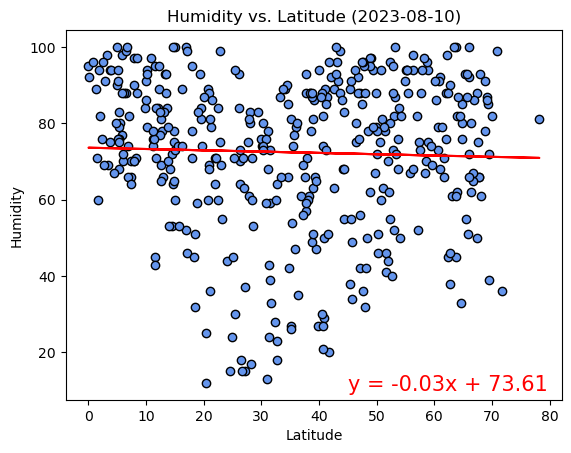

In [17]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker = "o", facecolor="cornflowerblue", edgecolors="black")
plt.plot(x_value,regress_values,"r-")

# Incorporate the other graph properties
plt.title(f"Humidity vs. Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (45,10), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.004795517778603738


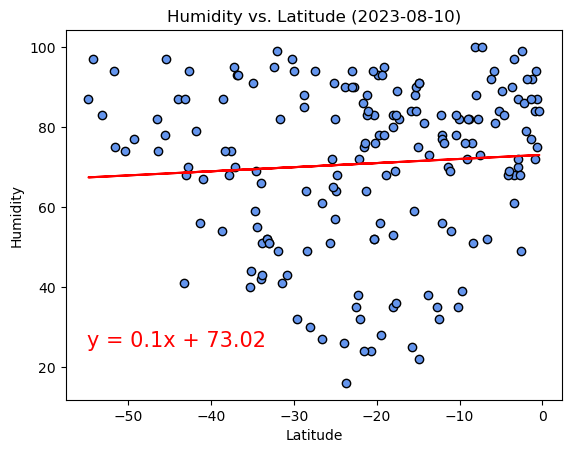

In [18]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker = "o", facecolor="cornflowerblue", edgecolors="black")
plt.plot(x_value,regress_values,"r-")

# Incorporate the other graph properties
plt.title(f"Humidity vs. Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (-55,25), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship: In the temperature vs humidity scatter plots we do not see any correlation between the two. 
In the northern hemisphere the r value is 0.0011823818557285355 and the southern hemisphere has a r value of 0.004795517778603738 which would indicate no correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0002768531867333981


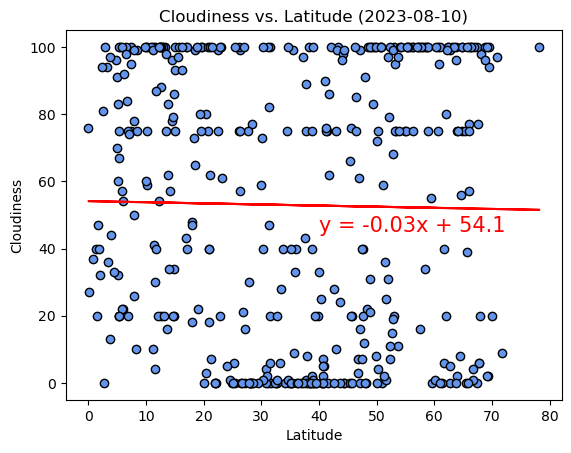

In [19]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker = "o", facecolor="cornflowerblue", edgecolors="black")
plt.plot(x_value,regress_values,"r-")

# Incorporate the other graph properties
plt.title(f"Cloudiness vs. Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (40,45), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.0015057640874953577


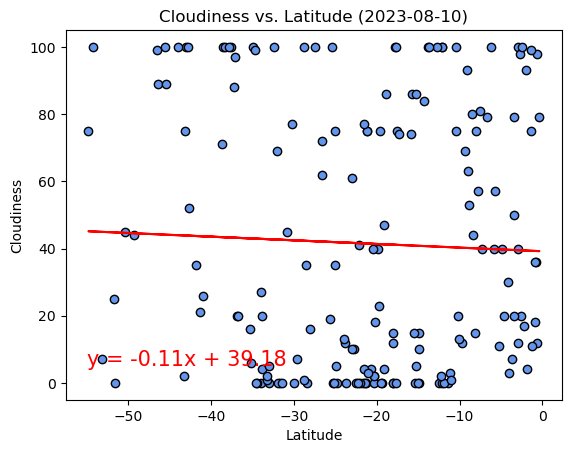

In [20]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker = "o", facecolor="cornflowerblue", edgecolors="black")
plt.plot(x_value,regress_values,"r-")

# Incorporate the other graph properties
plt.title(f"Cloudiness vs. Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (-55,5), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship: In the temperature vs humidity scatter plots we do not see any correlation between the two. 
In the northern hemisphere the r value is 0.0002768531867333981 and the southern hemisphere has a r value of 0.0015057640874953577 which would indicate no correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00023859767440324235


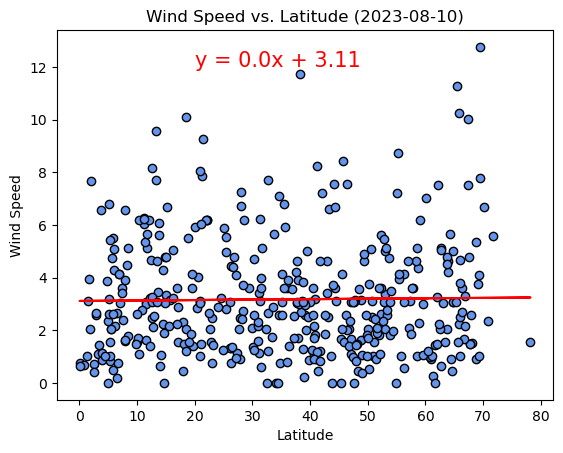

In [21]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker = "o", facecolor="cornflowerblue", edgecolors="black")
plt.plot(x_value,regress_values,"r-")

# Incorporate the other graph properties
plt.title(f"Wind Speed vs. Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (20,12), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.02683430905278387


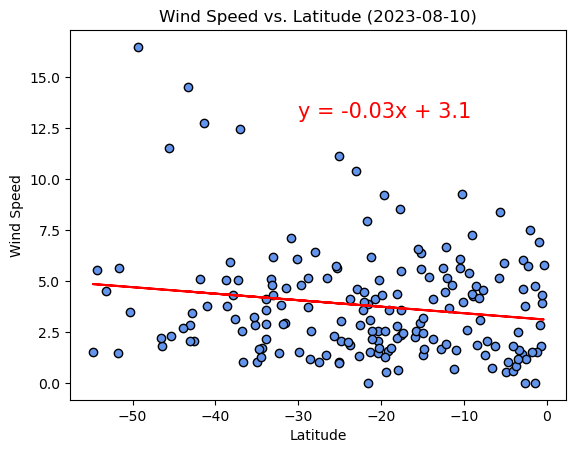

In [22]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker = "o", facecolor="cornflowerblue", edgecolors="black")
plt.plot(x_value,regress_values,"r-")

# Incorporate the other graph properties
plt.title(f"Wind Speed vs. Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (-30,13), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship: In the temperature vs humidity scatter plots we do not see any correlation between the two. In the northern hemisphere the r value is 0.00023859767440324235 and the southern hemisphere has a r value of 0.02683430905278387 which would indicate no correlation.